In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load a measured GSTF (Siemens Vida Fit)
npz = np.load('./example_GIRF.npz')
Hz0 = npz['Hz0']  # Zeroth-order GSTF
Hzz = npz['Hzz']  # Linear-order Z-GSTF
dt = 10e-6        # Temporal sampling [s]

# Compute the frequency axis for the GSTF
h_freq = np.fft.fftshift(np.fft.fftfreq(len(Hzz), dt))

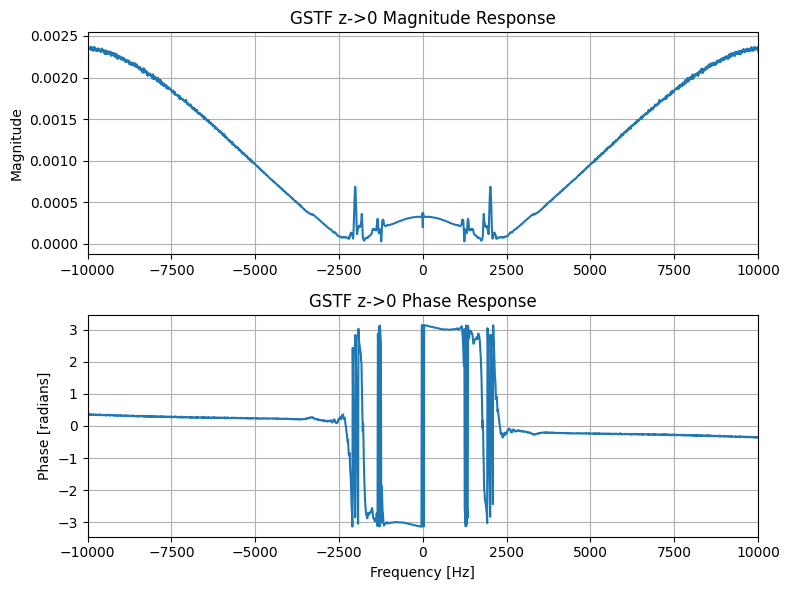

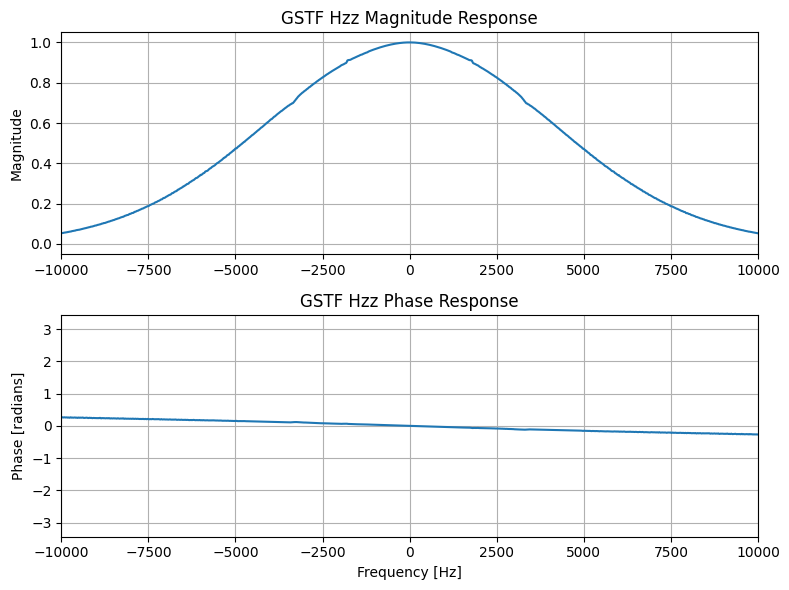

In [ ]:
# Plot the Hz0 GSTF response
plt.figure(figsize=(8, 6))

# Magnitude subplot
plt.subplot(2, 1, 1)
plt.plot(h_freq, np.abs(Hz0))
plt.title('GSTF z->0 Magnitude Response')
plt.xlim(-10000, 10000)
plt.ylabel('Magnitude')
plt.grid(True)

# Phase subplot
plt.subplot(2, 1, 2)
plt.plot(h_freq, np.angle(Hz0))
plt.title('GSTF z->0 Phase Response')
plt.xlim(-10000, 10000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(True)

plt.tight_layout()
plt.show()


# Plot the Hzz GSTF response
plt.figure(figsize=(8, 6))

# Magnitude subplot
plt.subplot(2, 1, 1)
plt.plot(h_freq, np.abs(Hzz))
plt.title('GSTF Hzz Magnitude Response')
plt.xlim(-10000, 10000)
plt.ylabel('Magnitude')
plt.grid(True)

# Phase subplot
plt.subplot(2, 1, 2)
plt.plot(h_freq, np.angle(Hzz))
plt.title('GSTF Hzz Phase Response')
plt.xlim(-10000, 10000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(True)

plt.tight_layout()
plt.show()

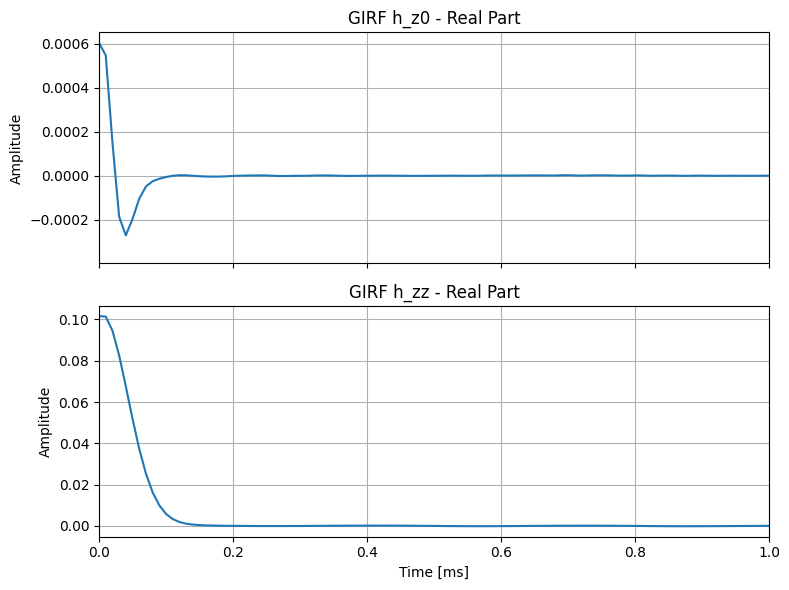

In [17]:
# Compute the GIRFs
hz0 = np.fft.ifft(np.fft.ifftshift(Hz0))   # time-domain GIRF Hz0
hzz = np.fft.ifft(np.fft.ifftshift(Hzz))   # time-domain GIRF Hzz
t = np.arange(len(hz0)) * dt               # time vector [s]

# Time limit for plotting (1 ms)
time_limit = 1e-3

# Subplot 1: hz0 real part
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axs[0].plot(t * 1e3, hz0.real, label='Real Part')
axs[0].set_xlim(0, time_limit * 1e3)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('GIRF h_z0 - Real Part')
axs[0].grid(True)

# Subplot 2: hzz real part
axs[1].plot(t * 1e3, hzz.real, label='Real Part')
axs[1].set_xlim(0, time_limit * 1e3)
axs[1].set_xlabel('Time [ms]')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('GIRF h_zz - Real Part')
axs[1].grid(True)

plt.tight_layout()
plt.show()
